In [1]:
import numpy as np

In [2]:
sm_array = np.array([1, 2, 3, 4, 5])

In [3]:
sm_array = sm_array + 1

In [4]:
sm_array

array([2, 3, 4, 5, 6])

In [5]:
ones = np.ones((2,3))

In [6]:
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

In [7]:
two = np.ones((4,4),dtype=int)
two

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [8]:
np.square(two +1)*12

array([[48, 48, 48, 48],
       [48, 48, 48, 48],
       [48, 48, 48, 48],
       [48, 48, 48, 48]])

## Aggregation

In [9]:
listy_list = [1,2,3]

In [10]:
type(listy_list)

list

In [11]:
a1 = np.array([1,2,3])

In [12]:
np.sum(a1)

6

In [13]:
sum(a1)

6

# Use pythons method on python datatypes and use numpy methods for numpy arrays

In [14]:
massive_array = np.random.random(10000)

In [15]:
massive_array.size

10000

In [16]:
massive_array[:10]

array([0.06422774, 0.933561  , 0.60465628, 0.46325745, 0.24812029,
       0.65618869, 0.42280905, 0.58985765, 0.22420774, 0.39324743])

In [17]:
%timeit sum(massive_array) #python sum
%timeit np.sum(massive_array) #numpy sum

1.08 ms ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.87 µs ± 96.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
np.mean(massive_array)

0.5004408798391417

In [19]:
np.var(massive_array)

0.08478589937878721

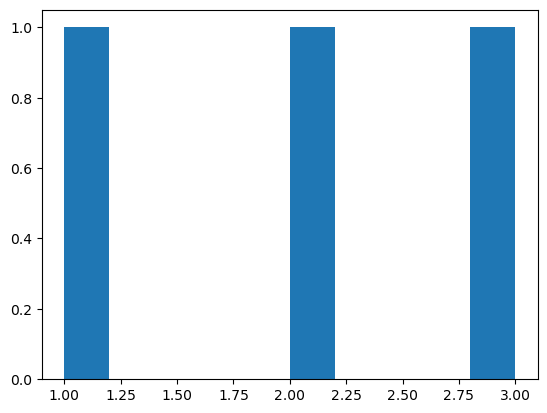

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(a1)
plt.show()

# Reshape and transpose

In [21]:
a2 = np.array([[1,2,3],[4,5,6]])

In [22]:
a2.shape

(2, 3)

In [23]:
a3 = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]])

In [24]:
a2 * a3

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

In [45]:
a3.shape

(2, 3, 3)

In [46]:
a2_reshape = a2.reshape(2,3,1)

In [47]:
a2_reshape

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [48]:
a2_reshape * a3

array([[[  1,   2,   3],
        [  8,  10,  12],
        [ 21,  24,  27]],

       [[ 40,  44,  48],
        [ 65,  70,  75],
        [ 96, 102, 108]]])

In [50]:
#Transpose
a2.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [51]:
a3.T

array([[[ 1, 10],
        [ 4, 13],
        [ 7, 16]],

       [[ 2, 11],
        [ 5, 14],
        [ 8, 17]],

       [[ 3, 12],
        [ 6, 15],
        [ 9, 18]]])

# Dot product (matrix multiplication)

In [57]:
np.random.seed(0)
mat1 = np.random.randint(10, size=(5,3))
mat2 = np.random.randint(10, size=(5,3))
mat1

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

In [58]:
mat2

array([[6, 7, 7],
       [8, 1, 5],
       [9, 8, 9],
       [4, 3, 0],
       [3, 5, 0]])

In [59]:
mat1 * mat2

array([[30,  0, 21],
       [24,  7, 45],
       [27, 40, 18],
       [16, 21,  0],
       [24, 40,  0]])

In [60]:
np.dot(mat1, mat2)

ValueError: shapes (5,3) and (5,3) not aligned: 3 (dim 1) != 5 (dim 0)

In [61]:
np.dot(mat1.T, mat2)

array([[121, 114,  77],
       [153, 108,  80],
       [135,  69,  84]])

## Dot product example (nut butter sales)

In [26]:
np.random.seed(0)
#number of jars sold
sales_amounts = np.random.randint(20, size=(5,3))
sales_amounts

array([[12, 15,  0],
       [ 3,  3,  7],
       [ 9, 19, 18],
       [ 4,  6, 12],
       [ 1,  6,  7]])

In [28]:
# create weekly sales DataFrame
import pandas as pd # type: ignore
weekly_sales = pd.DataFrame(sales_amounts, index=["Mon", "Tue", "Wed", "Thu", "Fri"], columns=["Almond Butter", "Peanut Butter", "Cashew Butter"])
weekly_sales

,Almond Butter,Peanut Butter,Cashew Butter
Mon,12,15,0
Tue,3,3,7
Wed,9,19,18
Thu,4,6,12
Fri,1,6,7


In [29]:
# create prices array
prices = np.array([10, 8, 12])
prices

array([10,  8, 12])

In [30]:
# create butter_prices DataFrame
butter_prices = pd.DataFrame(prices.reshape(1,3), index=["Price"], columns=["Almond Butter", "Peanut Butter", "Cashew Butter"])
butter_prices

,Almond Butter,Peanut Butter,Cashew Butter
Price,10,8,12


In [31]:
total_sales = prices.dot(sales_amounts)

ValueError: shapes (3,) and (5,3) not aligned: 3 (dim 0) != 5 (dim 0)

In [32]:
# shapes aren't aligned, let's transpose

total_sales = prices.dot(sales_amounts.T)
total_sales

array([240, 138, 458, 232, 142])

In [33]:
# create daily_sales
butter_prices.shape, weekly_sales.shape

((1, 3), (5, 3))

In [35]:
daily_sales = butter_prices.dot(weekly_sales.T)
daily_sales

,Mon,Tue,Wed,Thu,Fri
Price,240,138,458,232,142


In [37]:
weekly_sales["total ($)"] = daily_sales.T
weekly_sales

,Almond Butter,Peanut Butter,Cashew Butter,total ($)
Mon,12,15,0,240
Tue,3,3,7,138
Wed,9,19,18,458
Thu,4,6,12,232
Fri,1,6,7,142
